In [1]:
import pandas as pd
import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
#read data
cod_data = pd.read_csv("Cod_cwl_data.csv")

/Users/yvonnechen/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,32,34,35,63,64) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
len(cod_data)

18552

In [4]:
cod_data.columns

Index(['Unnamed: 0', 'match id', 'series id', 'end time', 'duration (s)',
       'mode', 'map', 'team', 'player', 'win?', 'score', 'kills', 'deaths',
       '+/-', 'k/d', 'kills per 10min', 'deaths per 10min', 'player score',
       'player spm', 'damage dealt', 'ekia', 'assists', 'headshots',
       'suicides', 'team kills', 'team deaths', 'kills (stayed alive)', 'hits',
       'shots', 'accuracy (%)', 'num lives', 'time alive (s)',
       'avg time per life (s)', 'fave weapon', 'fave specialist',
       'fave scorestreaks', 'hill time (s)', 'hill captures', 'hill defends',
       'snd rounds', 'snd firstbloods', 'snd firstdeaths', 'snd survives',
       'bomb pickups', 'bomb plants', 'bomb defuses', 'bomb sneak defuses',
       'snd 1-kill round', 'snd 2-kill round', 'snd 3-kill round',
       'snd 4-kill round', 'ctrl rounds', 'ctrl firstbloods',
       'ctrl firstdeaths', 'ctrl captures', '2-piece', '3-piece', '4-piece',
       '4-streak', '5-streak', '6-streak', '7-streak', '8+-st

In [5]:
len(cod_data.columns)

76

In [6]:
# avg duration of a COD game
avg_dur = sum(cod_data['duration (s)'])/len(cod_data)/60
avg_dur

11.14779179243927

In [23]:
cod_data

,Unnamed: 0,match id,series id,end time,duration (s),mode,map,team,player,win?,...,ctf returns,ctf pickups,ctf defends,ctf kill carriers,ctf flag carry time (s),scorestreaks earned,scorestreaks used,scorestreaks deployed,scorestreaks kills,scorestreaks assists
0,0,missing-pro-w1-1-map-1,pro-w1-1,2019-02-04 18:22:38 UTC,446,Hardpoint,Arsenal,Reciprocity,Denz,L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,missing-pro-w1-1-map-1,pro-w1-1,2019-02-04 18:22:38 UTC,446,Hardpoint,Arsenal,Reciprocity,Seany,L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,missing-pro-w1-1-map-1,pro-w1-1,2019-02-04 18:22:38 UTC,446,Hardpoint,Arsenal,Reciprocity,Tommey,L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,missing-pro-w1-1-map-1,pro-w1-1,2019-02-04 18:22:38 UTC,446,Hardpoint,Arsenal,Reciprocity,Wuskin,L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,missing-pro-w1-1-map-1,pro-w1-1,2019-02-04 18:22:38 UTC,446,Hardpoint,Arsenal,Reciprocity,Zed,L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18547,2147,5fe71c96-2160-5cfe-83b0-6c1267e79824,champ-grand-finals-0,2017-12-11 06:40:39 UTC,552,Search & Destroy,Sainte Marie du Mont,Splyce,Tommey,L,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18548,2148,5fe71c96-2160-5cfe-83b0-6c1267e79824,champ-grand-finals-0,2017-12-11 06:40:39 UTC,552,Search & Destroy,Sainte Marie du Mont,Team Kaliber,Accuracy,W,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18549,2149,5fe71c96-2160-5cfe-83b0-6c1267e79824,champ-grand-finals-0,2017-12-11 06:40:39 UTC,552,Search & Destroy,Sainte Marie du Mont,Team Kaliber,Chino,W,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18550,2150,5fe71c96-2160-5cfe-83b0-6c1267e79824,champ-grand-finals-0,2017-12-11 06:40:39 UTC,552,Search & Destroy,Sainte Marie du Mont,Team Kaliber,Kenny,W,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [196]:
cod_data['fave specialist']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
18547    NaN
18548    NaN
18549    NaN
18550    NaN
18551    NaN
Name: fave specialist, Length: 18552, dtype: object

## Fave Weapons

/Users/yvonnechen/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Maddox RFB'),
  Text(1, 0, 'Saug 9mm'),
  Text(2, 0, 'ICR-7'),
  Text(3, 0, 'PPSh-41'),
  Text(4, 0, 'FG 42'),
  Text(5, 0, 'Paladin HB50'),
  Text(6, 0, 'KN-57'),
  Text(7, 0, 'Kar98k'),
  Text(8, 0, 'Rampart 17'),
  Text(9, 0, 'SwordFish'),
  Text(10, 0, 'BAR'),
  Text(11, 0, 'Spitfire'),
  Text(12, 0, 'GKS'),
  Text(13, 0, 'Grav'),
  Text(14, 0, 'Outlaw 308'),
  Text(15, 0, 'Auger DMR')])

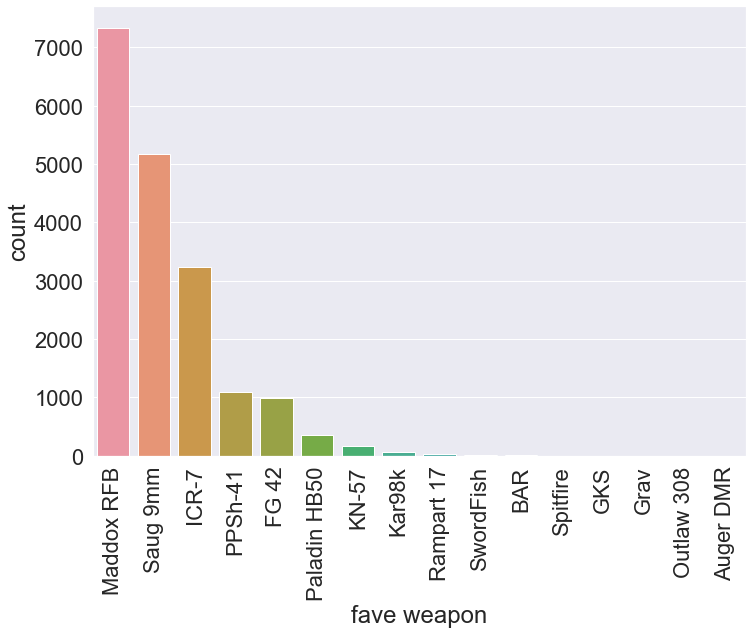

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=2)
sns.countplot(cod_data['fave weapon'], order = cod_data['fave weapon'].value_counts().index)
plt.xticks(rotation=90)

## Take top 6 most used weapon and plot with number of kills

/Users/yvonnechen/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/yvonnechen/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/yvonnechen/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

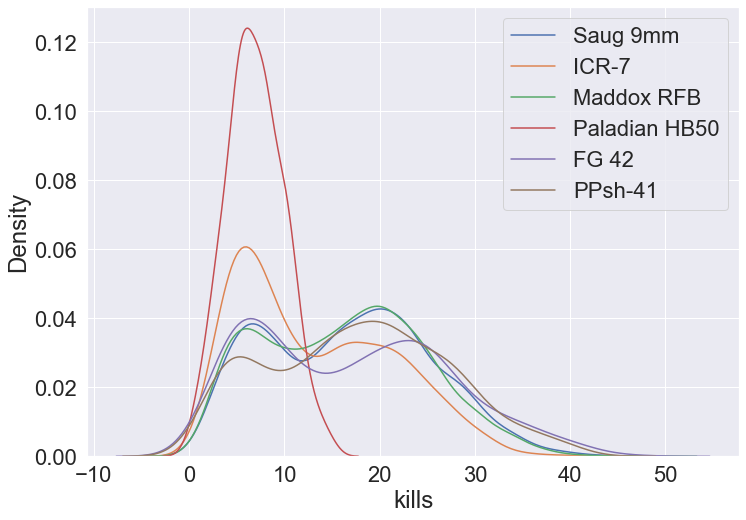

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=2)
sns.distplot(cod_data[cod_data['fave weapon']=='Saug 9mm']['kills'],hist=False, label='Saug 9mm')
sns.distplot(cod_data[cod_data['fave weapon']=='ICR-7']['kills'],hist=False, label='ICR-7')
sns.distplot(cod_data[cod_data['fave weapon']=='Maddox RFB']['kills'],hist=False, label='Maddox RFB')
sns.distplot(cod_data[cod_data['fave weapon']=='Paladin HB50']['kills'],hist=False, label='Paladian HB50')
sns.distplot(cod_data[cod_data['fave weapon']=='FG 42']['kills'],hist=False, label='FG 42')
sns.distplot(cod_data[cod_data['fave weapon']=='PPSh-41']['kills'],hist=False, label='PPsh-41')
plt.legend()

## Weapons with the most amount of wins

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Maddox RFB'),
  Text(1, 0, 'Saug 9mm'),
  Text(2, 0, 'ICR-7'),
  Text(3, 0, 'PPSh-41'),
  Text(4, 0, 'FG 42'),
  Text(5, 0, 'Paladin HB50'),
  Text(6, 0, 'KN-57'),
  Text(7, 0, 'Kar98k'),
  Text(8, 0, 'Rampart 17'),
  Text(9, 0, 'SwordFish'),
  Text(10, 0, 'BAR'),
  Text(11, 0, 'Spitfire'),
  Text(12, 0, 'GKS'),
  Text(13, 0, 'Grav'),
  Text(14, 0, 'Outlaw 308'),
  Text(15, 0, 'Auger DMR')])

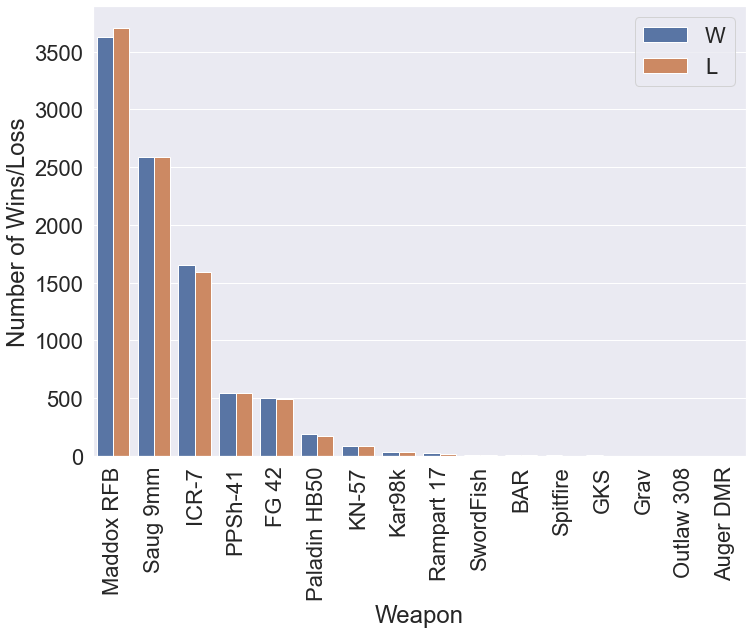

In [91]:
#sns.heatmap(pd.crosstab(cod_data['fave weapon'],cod_data['win?']))
hue_order = ['W', 'L']
sns.countplot(data=cod_data, x="fave weapon", hue="win?", hue_order=hue_order, order=cod_data['fave weapon'].value_counts().iloc[:20].index)
plt.ylabel("Number of Wins/Loss")
plt.xlabel("Weapon")
plt.legend(loc='upper right')
plt.xticks(rotation=90)

## Player with most wins

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

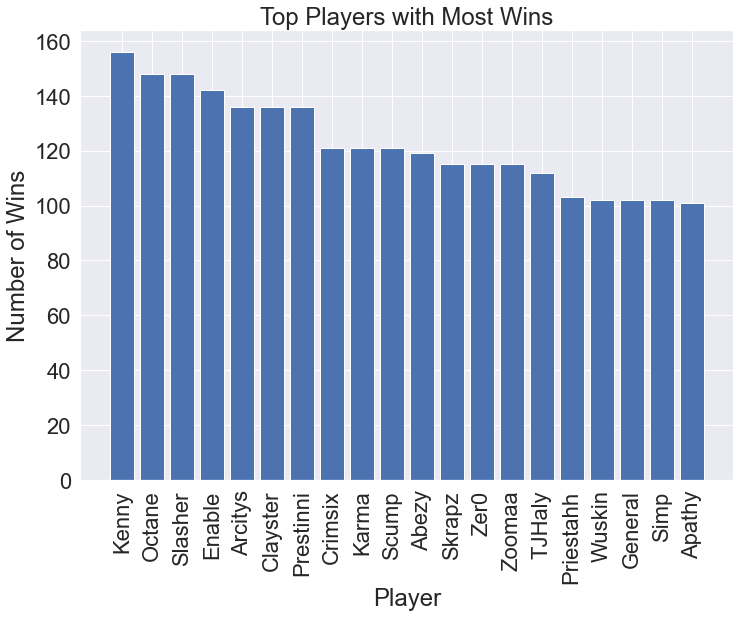

In [78]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=2)
win_player = {}
for i in cod_data['win?'].index:
    if cod_data['win?'][i] == 'W':
        if cod_data['player'][i] not in win_player:
            win_player[cod_data['player'][i]] = 1
        else:
            win_player[cod_data['player'][i]] += 1
            
sorted_win_player = dict(sorted(win_player.items(), key=lambda x:x[1], reverse=True))
x_winPlayer = list(sorted_win_player.keys())[:20]
y_winPlayer =list(sorted_win_player.items())[:20]
df = dict(y_winPlayer)

#sns.barplot(data=df, x="Player", y="Number of Wins")
plt.bar(*zip(*y_winPlayer))
plt.title("Top Players with Most Wins")
plt.xlabel("Player")
plt.ylabel("Number of Wins")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Kenny'),
  Text(1, 0, 'Slasher'),
  Text(2, 0, 'Octane'),
  Text(3, 0, 'Wailers'),
  Text(4, 0, 'Enable'),
  Text(5, 0, 'Arcitys'),
  Text(6, 0, 'Clayster'),
  Text(7, 0, 'Prestinni'),
  Text(8, 0, 'General'),
  Text(9, 0, 'Skrapz'),
  Text(10, 0, 'Rated'),
  Text(11, 0, 'Joee'),
  Text(12, 0, 'Zer0'),
  Text(13, 0, 'Zoomaa'),
  Text(14, 0, 'Silly'),
  Text(15, 0, 'Crimsix'),
  Text(16, 0, 'Scump'),
  Text(17, 0, 'Karma'),
  Text(18, 0, 'Breszy'),
  Text(19, 0, 'Wuskin')])

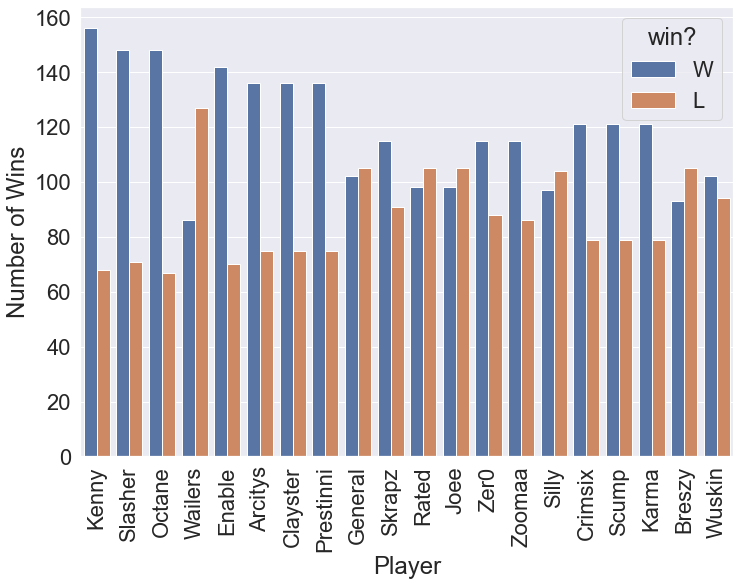

In [77]:
hue_order = ['W', 'L']
sns.countplot(data=cod_data, x="player", hue="win?", hue_order=hue_order, order=cod_data['player'].value_counts().iloc[:20].index)
plt.ylabel("Number of Wins")
plt.xlabel("Player")
plt.xticks(rotation=90)

## Fave Weapon vs Game mode

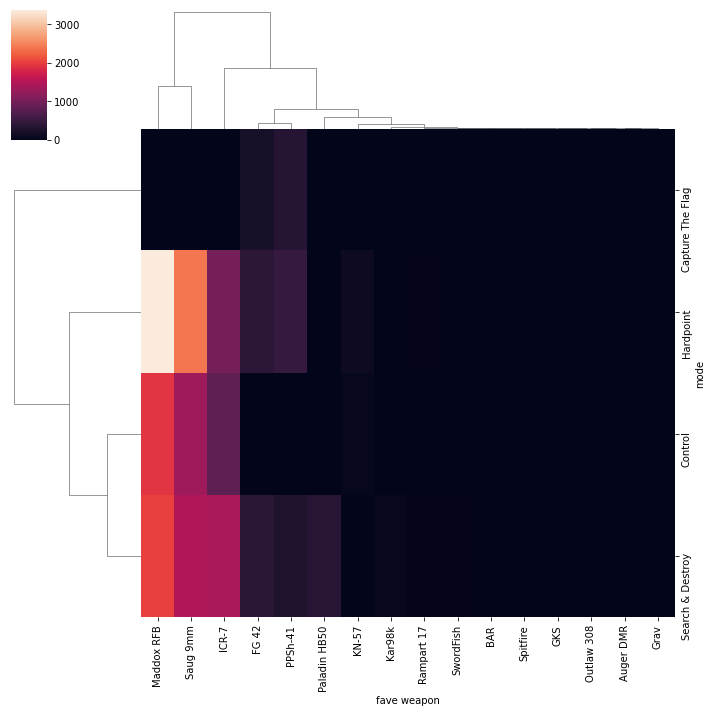

In [16]:
sns.clustermap(pd.crosstab(cod_data['mode'],cod_data['fave weapon']))

## Fave weapon vs Game map

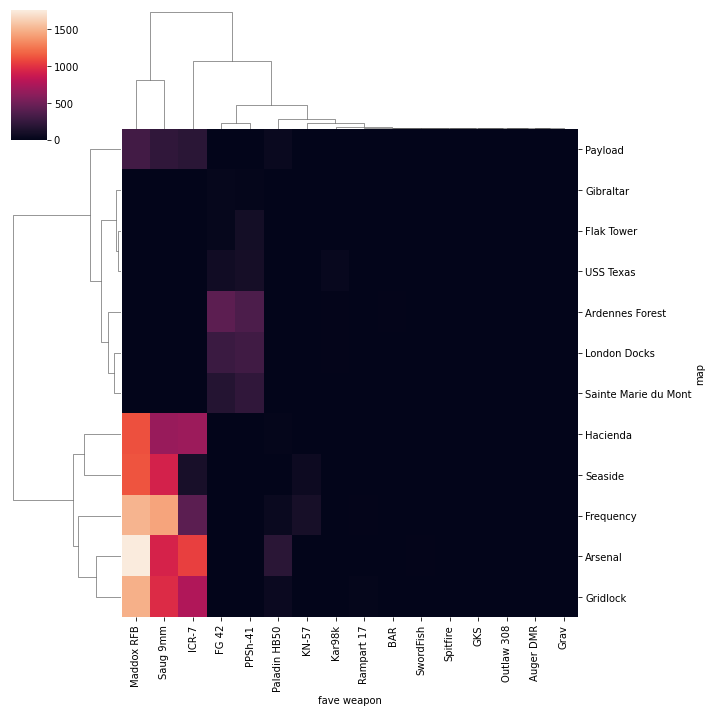

In [19]:
sns.clustermap(pd.crosstab(cod_data['map'],cod_data['fave weapon']))

## Fave Weapon vs Team

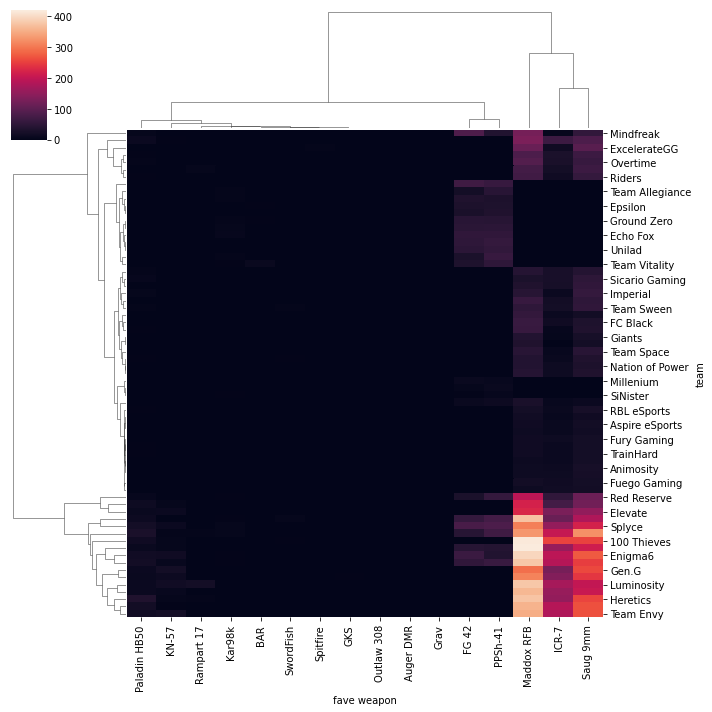

In [22]:
#needs normalization but can be done later
sns.clustermap(pd.crosstab(cod_data['team'],cod_data['fave weapon']))

## Duration of Game affects game?

/Users/yvonnechen/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:712: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim(0, max_dependent_coord * 1.05)


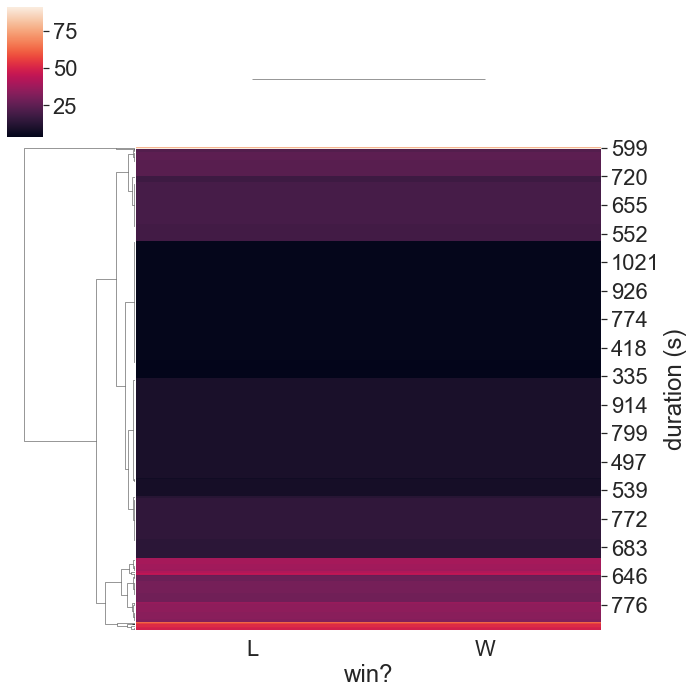

In [86]:
sns.clustermap(pd.crosstab(cod_data['duration (s)'],cod_data['win?']))


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '600'),
  Text(1, 0, '599'),
  Text(2, 0, '640'),
  Text(3, 0, '659'),
  Text(4, 0, '622'),
  Text(5, 0, '601'),
  Text(6, 0, '607'),
  Text(7, 0, '603'),
  Text(8, 0, '651'),
  Text(9, 0, '537'),
  Text(10, 0, '606'),
  Text(11, 0, '661'),
  Text(12, 0, '636'),
  Text(13, 0, '635'),
  Text(14, 0, '653'),
  Text(15, 0, '643'),
  Text(16, 0, '518'),
  Text(17, 0, '578'),
  Text(18, 0, '644'),
  Text(19, 0, '633')])

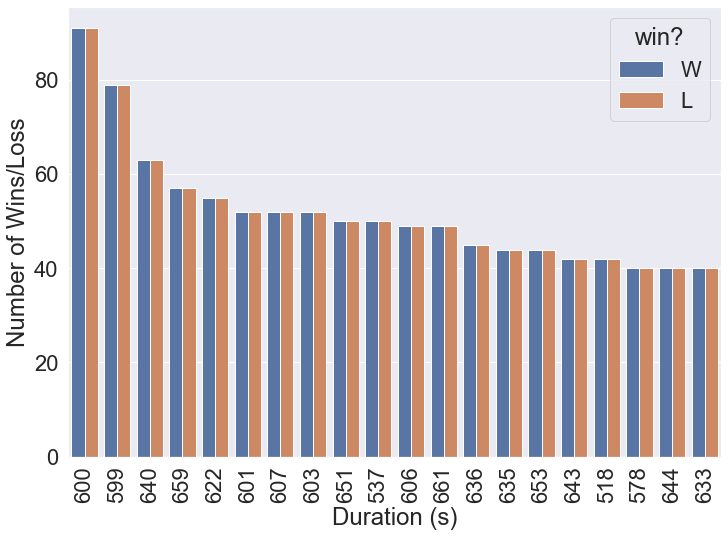

In [94]:
hue_order = ['W', 'L']
sns.countplot(data=cod_data, x="duration (s)", hue="win?", hue_order=hue_order, order=cod_data['duration (s)'].value_counts().iloc[:20].index)
plt.ylabel("Number of Wins/Loss")
plt.xlabel("Duration (s)")
plt.xticks(rotation=90)

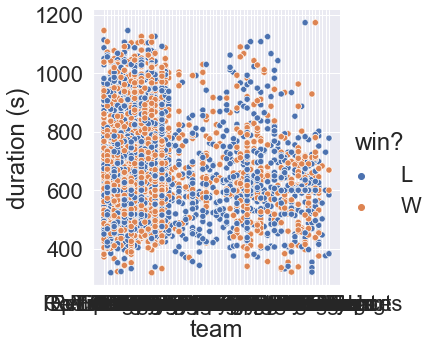

In [100]:
sns.relplot(data=cod_data, x="team", y="duration (s)", hue="win?")

## Top 20 Teams

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'eUnited'),
  Text(1, 0, 'Enigma6'),
  Text(2, 0, 'OpTic Gaming'),
  Text(3, 0, '100 Thieves'),
  Text(4, 0, 'Evil Geniuses'),
  Text(5, 0, 'Splyce'),
  Text(6, 0, 'Team Envy'),
  Text(7, 0, 'Reciprocity'),
  Text(8, 0, 'Heretics'),
  Text(9, 0, 'FaZe Clan'),
  Text(10, 0, 'Luminosity'),
  Text(11, 0, 'UYU'),
  Text(12, 0, 'Midnight'),
  Text(13, 0, 'Gen.G'),
  Text(14, 0, 'Elevate'),
  Text(15, 0, 'Red Reserve'),
  Text(16, 0, 'Denial'),
  Text(17, 0, 'Mindfreak'),
  Text(18, 0, 'Units'),
  Text(19, 0, 'ExcelerateGG')])

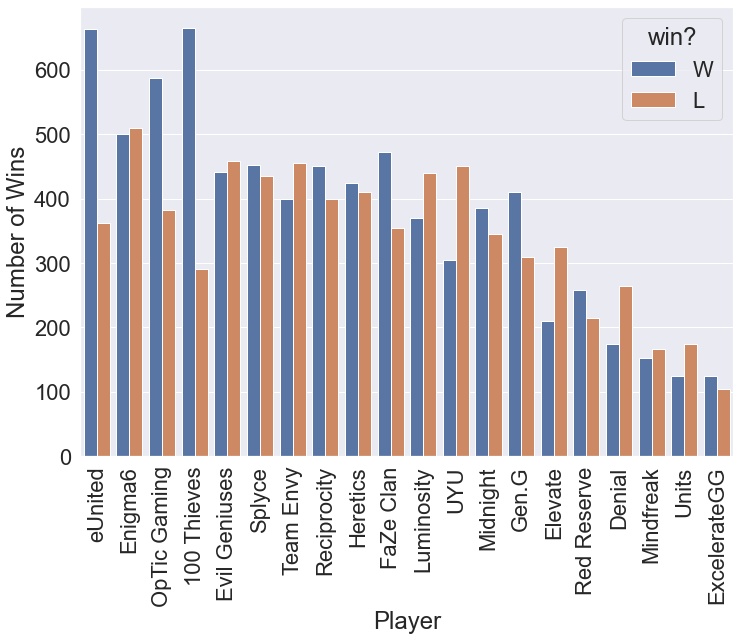

In [101]:
hue_order = ['W', 'L']
sns.countplot(data=cod_data, x="team", hue="win?", hue_order=hue_order, order=cod_data['team'].value_counts().iloc[:20].index)
plt.ylabel("Number of Wins")
plt.xlabel("Player")
plt.xticks(rotation=90)

/Users/yvonnechen/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: 'L'

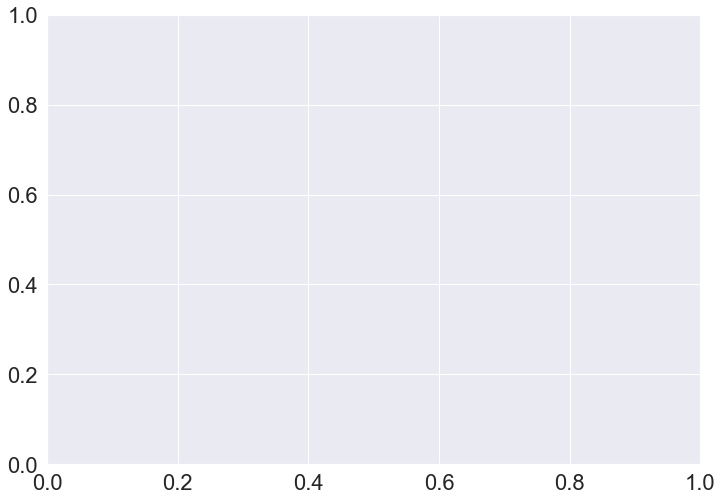

In [102]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=2)
sns.distplot(cod_data[cod_data['team']=='eUnited']['win?'],hist=False, label='eUnited')
sns.distplot(cod_data[cod_data['team']=='Enigma6']['win?'],hist=False, label='Enigma6')
sns.distplot(cod_data[cod_data['team']=='OpTic Gaming']['win?'],hist=False, label='OpTic Gaming')
sns.distplot(cod_data[cod_data['team']=='100 Thieves']['win?'],hist=False, label='100 Thieves')
sns.distplot(cod_data[cod_data['team']=='Evil Geniuses']['win?'],hist=False, label='Evil Geniuses')
sns.distplot(cod_data[cod_data['team']=='Splyce']['win?'],hist=False, label='Splyce')
plt.legend()

In [128]:
top_6_teams = cod_data.loc[cod_data['team'].isin(["eUnited","Enigma6","OpTic Gaming","100 thieves","Evil Geniuses","Splyce"])]

([0, 1], [Text(0, 0, 'L'), Text(1, 0, 'W')])

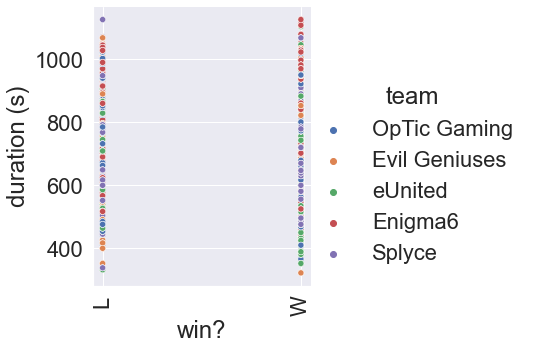

In [133]:
sns.relplot(data=top_6_teams, x="win?", y="duration (s)", hue="team")
plt.xticks(rotation=90)

In [122]:
eUnited = cod_data.loc[cod_data['team']== "eUnited"]
Enigma6 = cod_data.loc[cod_data['team']== "Enigma6"]
OpTic_Gaming = cod_data.loc[cod_data['team']== "OpTic Gaming"]
thieves = cod_data.loc[cod_data['team']== "100 thieves"]
Evil_Geniuses = cod_data.loc[cod_data['team']== "Evil Geniuses"]
Splyce = cod_data.loc[cod_data['team']== "Splyce"]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, '600'),
  Text(1, 0, '620'),
  Text(2, 0, '636'),
  Text(3, 0, '586'),
  Text(4, 0, '518'),
  Text(5, 0, '652'),
  Text(6, 0, '721'),
  Text(7, 0, '677'),
  Text(8, 0, '738'),
  Text(9, 0, '906'),
  Text(10, 0, '973'),
  Text(11, 0, '856'),
  Text(12, 0, '759'),
  Text(13, 0, '804'),
  Text(14, 0, '648'),
  Text(15, 0, '493'),
  Text(16, 0, '521'),
  Text(17, 0, '480'),
  Text(18, 0, '426'),
  Text(19, 0, '463'),
  Text(20, 0, '622'),
  Text(21, 0, '545'),
  Text(22, 0, '552'),
  Text(23, 0, '557'),
  Text(24, 0, '425'),
  Text(25, 0, '476')])

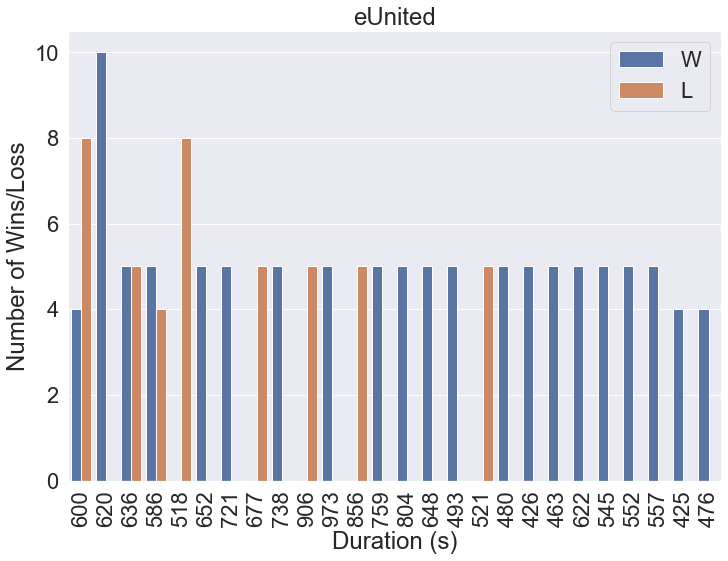

In [139]:
hue_order = ['W', 'L']
sns.countplot(data=eUnited, x="duration (s)", hue="win?", hue_order=hue_order, order=eUnited['duration (s)'].value_counts().iloc[::7].index)
plt.ylabel("Number of Wins/Loss")
plt.xlabel("Duration (s)")
plt.title("eUnited")
plt.legend(loc='upper right')
plt.xticks(rotation=90)

In [176]:
from collections import OrderedDict

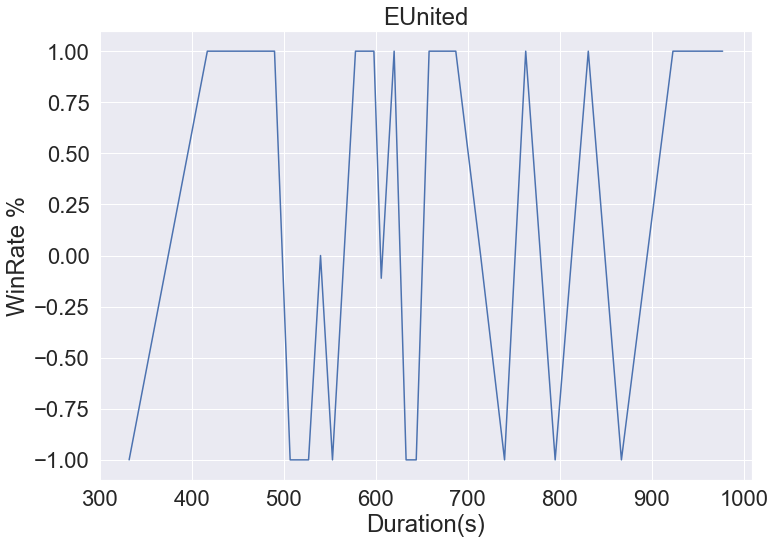

"\nfor i in eUnited_durC:\n    print(i)\n    print(eUnited_durC[i])\n        \nfor i in eUnited_winCount:\n    print(i)\n    print(eUnited_winCount[i])\neUnited = {}\nfor i in cod_data['win?'].index:\n    if cod_data['win?'][i] == 'W':\n        if cod_data['player'][i] not in win_player:\n            win_player[cod_data['player'][i]] = 1\n        else:\n            win_player[cod_data['player'][i]] += 1\n"

In [185]:
eUnited_winCount = {}
for i in eUnited['win?'].index:
    if eUnited['win?'][i] == 'W':
        if eUnited['duration (s)'][i] not in eUnited_winCount :
            eUnited_winCount[eUnited['duration (s)'][i]] = 1
        else:
            eUnited_winCount[eUnited['duration (s)'][i]] += 1
    else:
        if eUnited['duration (s)'][i] not in eUnited_winCount :
            eUnited_winCount[eUnited['duration (s)'][i]] = -1
        else:
            eUnited_winCount[eUnited['duration (s)'][i]] -= 1
            
eUnited_durC = {}
for i in eUnited['win?'].index:
    if eUnited['duration (s)'][i] not in eUnited_durC:
        eUnited_durC[eUnited['duration (s)'][i]] = 1
    else:
        eUnited_durC[eUnited['duration (s)'][i]] += 1

        
for i in eUnited_winCount:
    #print(eUnited_winCount[i])
    eUnited_winCount[i] = eUnited_winCount[i] / eUnited_durC[i]
   
    
# = list(OrderedDict(sorted(eUnited_winCount.items())))
sorted_eUnited = sorted(eUnited_winCount.items())[::7]
plt.plot(*zip(*sorted_eUnited))
plt.xlabel("Duration(s)")
plt.ylabel("WinRate %")
plt.title("EUnited")
plt.show()


'''
for i in eUnited_durC:
    print(i)
    print(eUnited_durC[i])
        
for i in eUnited_winCount:
    print(i)
    print(eUnited_winCount[i])
eUnited = {}
for i in cod_data['win?'].index:
    if cod_data['win?'][i] == 'W':
        if cod_data['player'][i] not in win_player:
            win_player[cod_data['player'][i]] = 1
        else:
            win_player[cod_data['player'][i]] += 1
'''

<AxesSubplot:xlabel='duration (s)', ylabel='win?'>

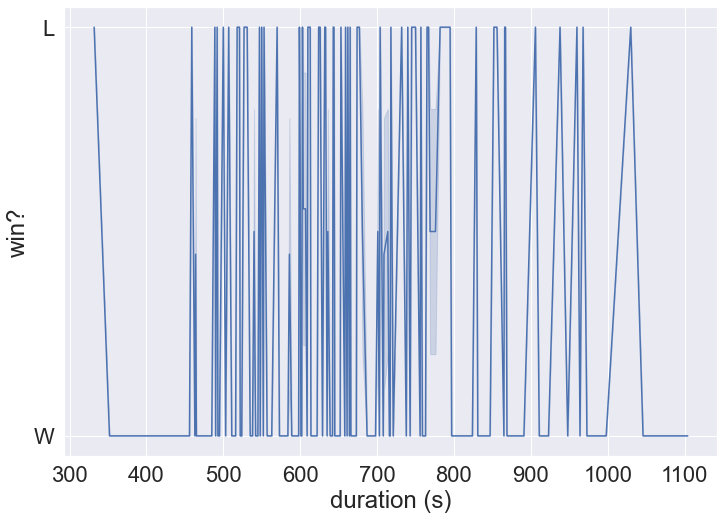

In [186]:
sns.lineplot(data=eUnited, x="duration (s)", y="win?")

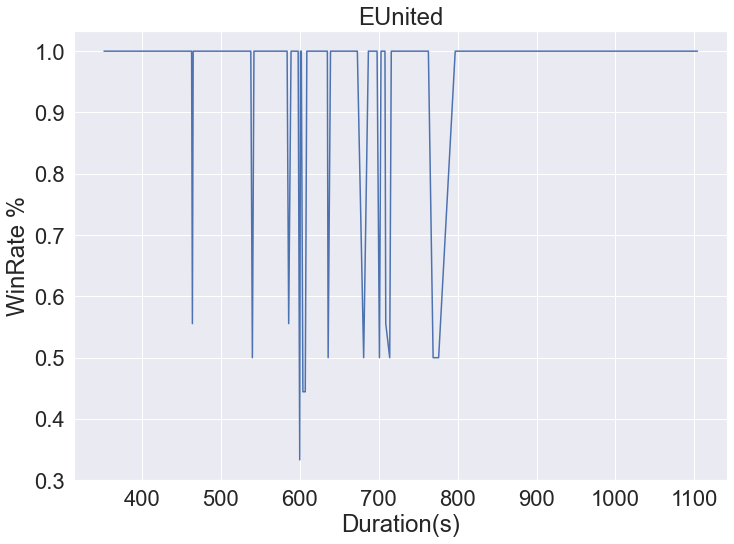

In [194]:
eUnited_winCount = {}
for i in eUnited['win?'].index:
    if eUnited['win?'][i] == 'W':
        if eUnited['duration (s)'][i] not in eUnited_winCount :
            eUnited_winCount[eUnited['duration (s)'][i]] = 1
        else:
            eUnited_winCount[eUnited['duration (s)'][i]] += 1
            
eUnited_durC = {}
for i in eUnited['win?'].index:
    if eUnited['duration (s)'][i] not in eUnited_durC:
        eUnited_durC[eUnited['duration (s)'][i]] = 1
    else:
        eUnited_durC[eUnited['duration (s)'][i]] += 1

        
for i in eUnited_winCount:
    #print(eUnited_winCount[i])
    eUnited_winCount[i] = eUnited_winCount[i] / eUnited_durC[i]
   
    
# = list(OrderedDict(sorted(eUnited_winCount.items())))
sorted_eUnited = sorted(eUnited_winCount.items())
plt.plot(*zip(*sorted_eUnited))
plt.xlabel("Duration(s)")
plt.ylabel("WinRate %")
plt.title("EUnited")
plt.show()